In [70]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


test_data = pd.read_csv('D:/Valerian/Documents/OneDrive/Python/ДопОбр Анализ данных/Практика Нетодология/sales_prediction/Команда_11/test.csv', encoding='iso-8859-1')

train_data = pd.read_csv('D:/Valerian/Documents/OneDrive/Python/ДопОбр Анализ данных/Практика Нетодология/sales_prediction/Команда_11/train.csv', parse_dates=['Date'], low_memory=False)

# Загрузка данных из файла store.csv
store_data = pd.read_csv('D:/Valerian/Documents/OneDrive/Python/ДопОбр Анализ данных/Практика Нетодология/sales_prediction/Команда_11/store.csv', encoding='iso-8859-1')




In [71]:
df_form = train_data.copy()

df_form.replace({' - ': np.nan, '\\N': np.nan, 'NaN': np.nan}, inplace=True)
df_form = df_form.dropna()

#print(df_form.head())

Описание количественных переменных:
              Store     DayOfWeek                           Date  \
count  1.017209e+06  1.017209e+06                        1017209   
mean   5.584297e+02  3.998341e+00  2014-04-11 01:30:42.846061824   
min    1.000000e+00  1.000000e+00            2013-01-01 00:00:00   
25%    2.800000e+02  2.000000e+00            2013-08-17 00:00:00   
50%    5.580000e+02  4.000000e+00            2014-04-02 00:00:00   
75%    8.380000e+02  6.000000e+00            2014-12-12 00:00:00   
max    1.115000e+03  7.000000e+00            2015-07-31 00:00:00   
std    3.219087e+02  1.997391e+00                            NaN   

              Sales     Customers          Open         Promo  SchoolHoliday  
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06  
mean   5.773819e+03  6.331459e+02  8.301067e-01  3.815145e-01   1.786467e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    3.727000e+03  4.050000e+02  

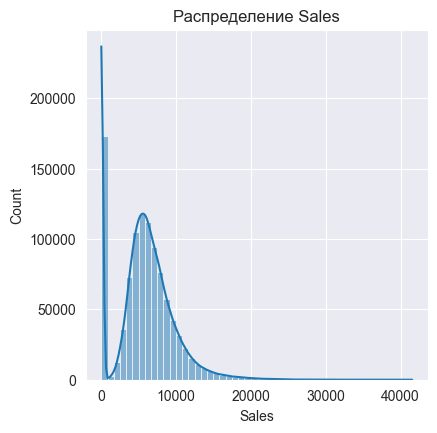

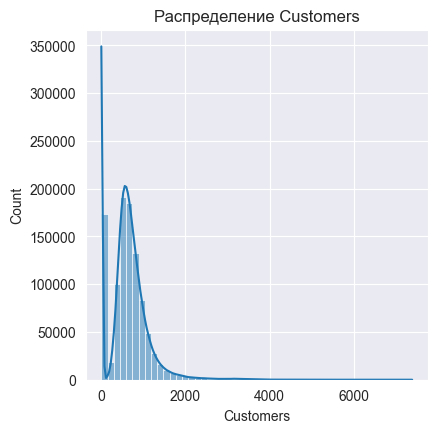

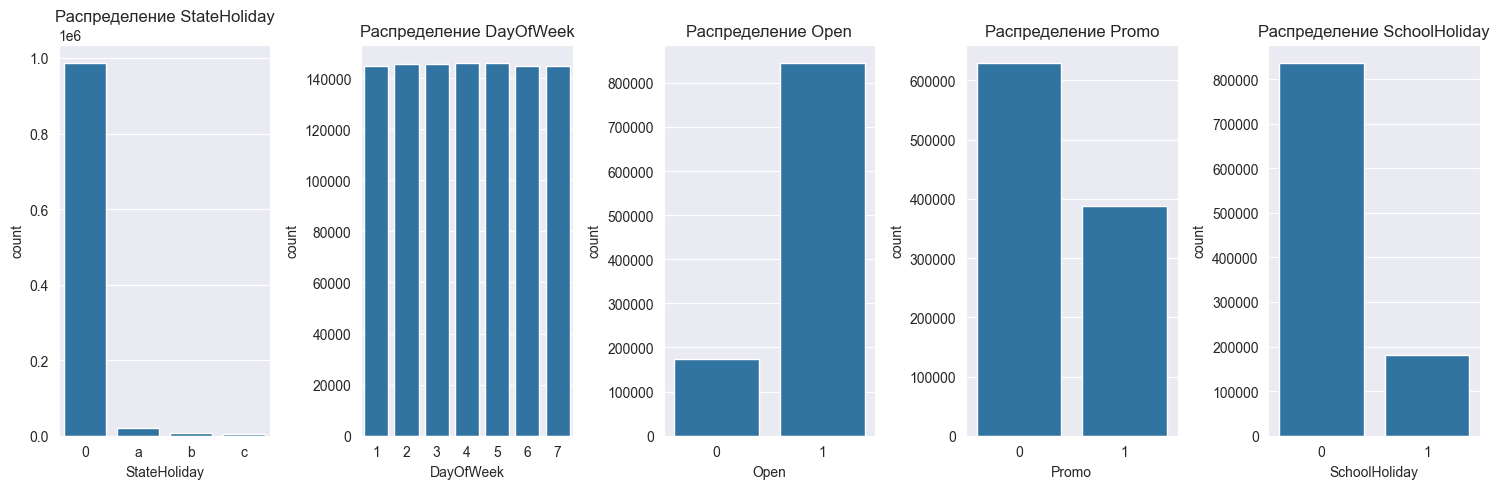

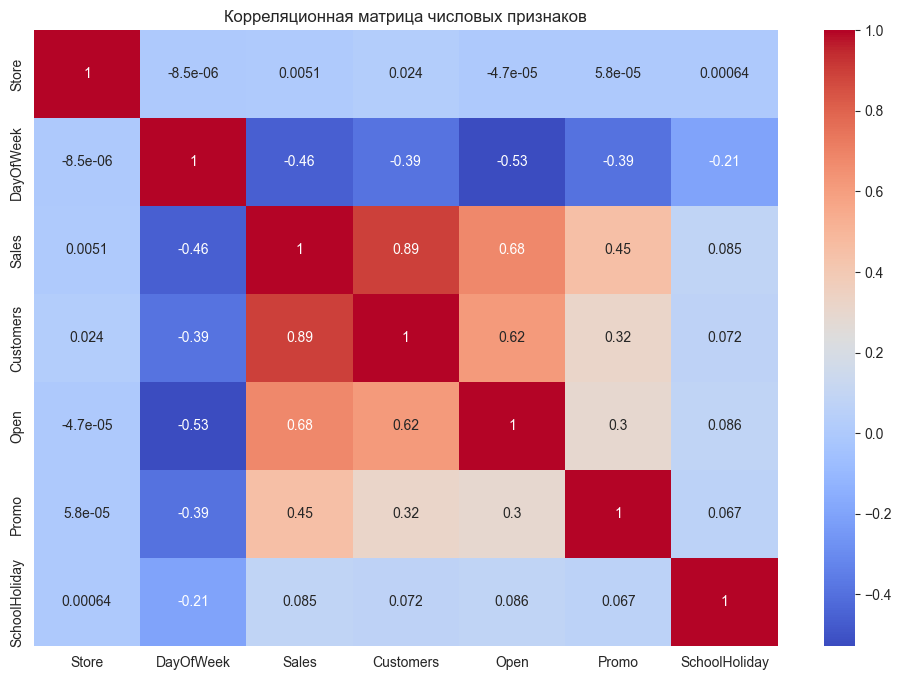

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Описание количественных переменных:")
print(df_form.describe())


# Числовые столбцы
numeric_columns = ['Sales', 'Customers']

# Визуализация числовых столбцов

for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, i+1)
    sns.histplot(df_form[col], bins=50, kde=True)
    plt.title(f'Распределение {col}')
    plt.show()

# Визуализация категориальных столбцов
categorical_columns = [ 'StateHoliday', 'DayOfWeek',  'Open', 'Promo' , 'SchoolHoliday']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i+1)
    sns.countplot(x=df_form[col])
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

# Выбираем только числовые столбцы для корреляционного анализа
numeric_df = df_form.select_dtypes(include=[np.number])


# Удаляем строки с пропущенными значениями в числовых столбцах
numeric_df = numeric_df.dropna()

# Проверка корреляции между числовыми признаками
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()



In [73]:
# Факторизация категориальных столбцов
categorical_column = [ 'StateHoliday', 'DayOfWeek',  'Open', 'Promo' , 'SchoolHoliday']

encoder = OneHotEncoder(sparse_output=False)
encoded_df_list = []

for name in categorical_column:
    # Применение OneHotEncoder к целевому столбцу
    encoded_columns = encoder.fit_transform(df_form[[name]])
    # Преобразование закодированных данных в DataFrame
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out([name]))
    encoded_df_list.append(encoded_df)

# Объединение закодированных столбцов с исходным DataFrame (удалив при этом исходные столбцы)
df_form = df_form.drop(columns=categorical_column)
df_form = pd.concat([df_form] + encoded_df_list, axis=1)


In [74]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Добавление временных признаков в DataFrame
df_form['Year'] = df_form['Date'].dt.year
df_form['Month'] = df_form['Date'].dt.month
df_form['Day'] = df_form['Date'].dt.day

# Убедимся, что данные добавлены корректно
print(df_form[['Date', 'Year', 'Month', 'Day']].head())

# 2. Обновление списка категориальных столбцов для кодирования
categorical_column = ['StateHoliday', 'SchoolHoliday', 'Promo', 'Open', 'Year', 'Month']

# Убедитесь, что все столбцы из списка есть в DataFrame
categorical_column = [col for col in categorical_column if col in df_form.columns]

# 3. Факторизация категориальных столбцов
encoder = OneHotEncoder(sparse_output=False)
encoded_df_list = []

for name in categorical_column:
    # Применение OneHotEncoder к целевому столбцу
    encoded_columns = encoder.fit_transform(df_form[[name]])
    # Преобразование закодированных данных в DataFrame
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out([name]))
    encoded_df_list.append(encoded_df)

# Объединение закодированных столбцов с исходным DataFrame (удалив при этом исходные столбцы)
df_form = df_form.drop(columns=categorical_column)
df_form = pd.concat([df_form] + encoded_df_list, axis=1)

# 4. Удаление столбца с датой перед моделированием и анализом корреляций
df_form = df_form.drop(columns=['Date'])

# Убедимся, что результат корректный
print(df_form.head())

# Далее продолжаем анализ данных и моделирование...


        Date  Year  Month  Day
0 2015-07-31  2015      7   31
1 2015-07-31  2015      7   31
2 2015-07-31  2015      7   31
3 2015-07-31  2015      7   31
4 2015-07-31  2015      7   31
   Store  Sales  Customers  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
0      1   5263        555             1.0             0.0             0.0   
1      2   6064        625             1.0             0.0             0.0   
2      3   8314        821             1.0             0.0             0.0   
3      4  13995       1498             1.0             0.0             0.0   
4      5   4822        559             1.0             0.0             0.0   

   StateHoliday_c  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  ...  Month_3  \
0             0.0          0.0          0.0          0.0  ...      0.0   
1             0.0          0.0          0.0          0.0  ...      0.0   
2             0.0          0.0          0.0          0.0  ...      0.0   
3             0.0          0.0          0.0      

In [75]:
# Определяем целевую переменную (в данном случае, допустим, что 'Sales' - это целевая переменная)
target = 'Sales'

# Разделяем признаки (X) и целевую переменную (y)
X = df_form.drop(columns=[target])
Y = df_form[target]

# Разделяем данные на тренировочный и тестовый наборы
# Например, тестовый набор составит 20% от всех данных
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)


In [76]:
print(train_points)

         Store  Customers  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
187382      63        635             1.0             0.0             0.0   
339843     740        432             1.0             0.0             0.0   
82382      988        683             1.0             0.0             0.0   
734320     321        603             1.0             0.0             0.0   
1016305    211          0             0.0             1.0             0.0   
...        ...        ...             ...             ...             ...   
998730     476        587             1.0             0.0             0.0   
328915    1079        521             1.0             0.0             0.0   
936212     398        514             1.0             0.0             0.0   
597199     345          0             1.0             0.0             0.0   
65438      769       4050             1.0             0.0             0.0   

         StateHoliday_c  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(train_points, train_values)

# Прогнозируем значения на тестовом наборе данных
lr_predict = model.predict(test_points)

# Оцениваем модель с использованием метрик MAE, MSE, RMSE и R^2
mae = mean_absolute_error(test_values, lr_predict)
mse = mean_squared_error(test_values, lr_predict)
rmse = np.sqrt(mse)
r2 = r2_score(test_values, lr_predict)

# Выводим значения MAE, MSE, RMSE и R^2
print(f"Среднее абсолютное отклонение (MAE) на тестовых данных: {mae}")
print(f"Среднеквадратичная ошибка (MSE) на тестовых данных: {mse}")
print(f"Корень средней квадратичной ошибки (RMSE) на тестовых данных: {rmse}")
print(f"Коэффициент детерминации (R^2) на тестовых данных: {r2}")


Среднее абсолютное отклонение (MAE) на тестовых данных: 974.4462632072166
Среднеквадратичная ошибка (MSE) на тестовых данных: 2050805.143875851
Корень средней квадратичной ошибки (RMSE) на тестовых данных: 1432.0632471632848
Коэффициент детерминации (R^2) на тестовых данных: 0.8616664627368963


In [78]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Создаем и обучаем модель XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(train_points, train_values)

# Прогнозируем значения на тестовом наборе данных
xgb_predict = xg_reg.predict(test_points)

# Оцениваем модель с использованием MAE, MSE, RMSE и R^2
mae_xgb = mean_absolute_error(test_values, xgb_predict)
mse_xgb = mean_squared_error(test_values, xgb_predict)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(test_values, xgb_predict)

# Выводим значения MAE, MSE, RMSE и R^2
print(f"Среднее абсолютное отклонение (MAE) на тестовых данных: {mae_xgb}")
print(f"Среднеквадратичная ошибка (MSE) на тестовых данных: {mse_xgb}")
print(f"Корень средней квадратичной ошибки (RMSE) на тестовых данных: {rmse_xgb}")
print(f"Коэффициент детерминации (R^2) на тестовых данных: {r2_xgb}")


Среднее абсолютное отклонение (MAE) на тестовых данных: 860.6905997553253
Среднеквадратичная ошибка (MSE) на тестовых данных: 1623351.7980697742
Корень средней квадратичной ошибки (RMSE) на тестовых данных: 1274.108236402926
Коэффициент детерминации (R^2) на тестовых данных: 0.8904995937229784


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Создаем модель случайного леса с оптимизированными параметрами
rf_model = RandomForestRegressor(
    n_estimators=50,  
    max_depth=10,  # Ограничение глубины деревьев для ускорения обучения
    n_jobs=-1,  # все доступные ядра процессора
    random_state=42
)

# Обучаем модель на тренировочных данных
rf_model.fit(train_points, train_values)

# Прогнозируем значения на тестовом наборе данных
rf_predict = rf_model.predict(test_points)

# Оцениваем модель с использованием MAE, MSE, RMSE и R^2
mae_rf = mean_absolute_error(test_values, rf_predict)
mse_rf = mean_squared_error(test_values, rf_predict)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(test_values, rf_predict)

# Выводим оценки
print(f"Среднее абсолютное отклонение (MAE) на тестовых данных (RandomForest): {mae_rf}")
print(f"Среднеквадратичная ошибка (MSE) на тестовых данных (RandomForest): {mse_rf}")
print(f"Корень средней квадратичной ошибки (RMSE) на тестовых данных (RandomForest): {rmse_rf}")
print(f"Коэффициент детерминации (R^2) на тестовых данных (RandomForest): {r2_rf}")


Среднее абсолютное отклонение (MAE) на тестовых данных (RandomForest): 837.3714827663188
Среднеквадратичная ошибка (MSE) на тестовых данных (RandomForest): 1559552.521928807
Корень средней квадратичной ошибки (RMSE) на тестовых данных (RandomForest): 1248.820452238354
Коэффициент детерминации (R^2) на тестовых данных (RandomForest): 0.8948030642744155


In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Функция для преобразования данных в формат CNN
def preprocess_for_cnn(data, height, width):
    return data.reshape(-1, height, width, 1)

# Преобразование данных
train_points_cnn = preprocess_for_cnn(train_points_np, height, width)
test_points_cnn = preprocess_for_cnn(test_points_np, height, width)

# Определение и компиляция модели CNN
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(height, width, 1)),
    MaxPooling2D(pool_size=(1, 2)),  # Изменено на (1, 2) чтобы избежать отрицательных размеров
    Dropout(0.25),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(1, 2)),  # Изменено на (1, 2)
    Dropout(0.25),
    BatchNormalization(),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(1, 2)),  # Изменено на (1, 2)
    Dropout(0.25),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Для регрессии
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Определение Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
results = cnn_model.fit(
    train_points_cnn, train_values,
    epochs=5,  # Увеличено количество эпох
    batch_size=32,
    validation_data=(test_points_cnn, test_values),
    callbacks=[early_stopping]
)

# Предсказание
cnn_predict = cnn_model.predict(test_points_cnn)

# Расчет метрик
mae_cnn = mean_absolute_error(test_values, cnn_predict)
rmse_cnn = np.sqrt(mean_squared_error(test_values, cnn_predict))
mse_cnn = mean_squared_error(test_values, cnn_predict)
r2_cnn = r2_score(test_values, cnn_predict)

# Вывод значений MAE, RMSE, MSE и R2
print(f"Среднее абсолютное отклонение (MAE) на тестовых данных (CNN): {mae_cnn}")
print(f"Корень средней квадратичной ошибки (RMSE) на тестовых данных (CNN): {rmse_cnn}")
print(f"Среднеквадратичная ошибка (MSE) на тестовых данных (CNN): {mse_cnn}")
print(f"Коэффициент детерминации (R2) на тестовых данных (CNN): {r2_cnn}")


D:\Valerian\Documents\OneDrive\Python\ДопОбр Анализ данных\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 216s 8ms/step - loss: 16394477.0000 - val_loss: 14825860.0000
Epoch 2/5
12690/25431 ━━━━━━━━━━━━━━━━━━━━ 1:46 8ms/step - loss: 15370751.0000

KeyboardInterrupt: 

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загрузка данных
df = pd.read_csv('D:/Valerian/Documents/OneDrive/Python/ДопОбр Анализ данных/Практика Нетодология/sales_prediction/Команда_11/train.csv', parse_dates=['Date'], low_memory=False)

# Преобразование даты в datetime
df['Date'] = pd.to_datetime(df['Date'])

# Обработка пропусков и ненужных значений
df = df.fillna(0)  # Или другой метод обработки пропусков

# Добавление дополнительных признаков (например, день недели, месяц)
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Преобразование категориальных данных в числовые
df = pd.get_dummies(df, columns=['StateHoliday'])

# Сортировка данных по дате
df = df.sort_values(by='Date')

# Удаление ненужных столбцов
df = df[['Store', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'SchoolHoliday', 'DayOfWeek', 'Month']]

# Нормализация признаков
scaler = StandardScaler()
df[['Sales', 'Customers', 'Open', 'Promo', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'SchoolHoliday', 'DayOfWeek', 'Month']] = scaler.fit_transform(df[['Sales', 'Customers', 'Open', 'Promo', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'SchoolHoliday', 'DayOfWeek', 'Month']])

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 30  # Длина окна

# Преобразование данных в массивы для CNN
train_sequences = create_sequences(train_df.values, seq_length)
test_sequences = create_sequences(test_df.values, seq_length)

X_train = train_sequences[:, :-1]
y_train = train_sequences[:, -1, 1]  # Sales is the second column
X_test = test_sequences[:, :-1]
y_test = test_sequences[:, -1, 1]

# Преобразование типов
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Создание модели
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Предсказание объема продаж

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик
mae_cnn = mean_absolute_error(y_test, y_pred)
mse_cnn = mean_squared_error(y_test, y_pred)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred)

# Вывод значений метрик
print(f"Среднее абсолютное отклонение (MAE) на тестовых данных (CNN): {mae_cnn}")
print(f"Корень средней квадратичной ошибки (RMSE) на тестовых данных (CNN): {rmse_cnn}")
print(f"Среднеквадратичная ошибка (MSE) на тестовых данных (CNN): {mse_cnn}")
print(f"Коэффициент детерминации (R2) на тестовых данных (CNN): {r2_cnn}")


D:\Valerian\Documents\OneDrive\Python\ДопОбр Анализ данных\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 13.4392 - val_loss: 0.4577
Epoch 2/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 0.4569 - val_loss: 0.4390
Epoch 3/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 0.4367 - val_loss: 0.4301
Epoch 4/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.4251 - val_loss: 0.4052
Epoch 5/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 0.4146 - val_loss: 0.4123
Epoch 6/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.4102 - val_loss: 0.4074
Epoch 7/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.4014 - val_loss: 0.4025
Epoch 8/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - loss: 0.3938 - val_loss: 0.4106
Epoch 9/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 0.3936 - val_loss: 0.3970
Epoch 10/10
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 0.3894 - val_loss: 0.3725
6357/6357 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Среднее абсолютное отклонение (MAE) на тестов